# Deep Learning with TensorFlow and Keras

### J. C. Vásquez-Correa

## Doc

1. https://www.tensorflow.org/
2. https://keras.io/


## Install

pip install tensorflow

pip install keras



<img src="https://www.tensorflow.org/_static/images/tensorflow/logo.png" width="250" align="middle">
<img src="https://viblo.asia/uploads/1b042898-d4d8-4a90-b7aa-831eea3a5f83.png" width="250" align="middle">


## What is Tensorflow?

Open source software library for numerical computation using data flow graphs. 
1. Nodes = represent mathematical operations,
2. Tensors = The central unit of data. 

---
Run over 
1. CPUs
1. GPUs
1. desktop,
1. Server
1. Mobile device with a single API.


In [2]:
import tensorflow as tf

sess=tf.Session()

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1)
print(node2)
node3 = tf.add(node1, node2)
sess.run(node3)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


7.0

### Linear model

In [3]:

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(linear_model, {x:[1,2,3,4]}))


[ 0.          0.30000001  0.60000002  0.90000004]


### loss functions

$$MAE=\sum\sqrt{\widehat{y}-y}$$

$$Lcross=-\sum y \cdot \mathrm{log}(\widehat{y})$$

In [4]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))


23.66


## Train: 

Stochastic gradient descendent

<img src="https://qph.ec.quoracdn.net/main-qimg-3a305b12d9030dcd3978e40461cb9ea1" width="500" align="middle">



In [5]:
LearningRate=0.01
iterations=1000

optimizer = tf.train.GradientDescentOptimizer(LearningRate) 
train = optimizer.minimize(loss)


sess.run(init) # reset values to incorrect defaults.
for i in range(iterations):
    sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run([W, b]))


[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


## Complete linear model for regression

In [6]:
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)


# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
    sess.run(train, {x:x_train, y:y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


<img src="https://www.tensorflow.org/images/getting_started_final.png" width="700" align="middle">


## Logistic regression




In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### 28x28 images handwrting digits

<img src="https://www.tensorflow.org/images/MNIST-Matrix.png" width="500" align="middle">

<img src="https://www.tensorflow.org/images/mnist-train-xs.png" width="500" align="middle">



In [8]:

x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y_pred = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(y_pred), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

for j in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_true: batch_ys})
    if j%100==0:
        print(j)


0
100
200
300
400
500
600
700
800
900


In [9]:
correct_prediction = tf.equal(tf.argmax(y_true,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))


0.9007


### Link
http://playground.tensorflow.org

In [16]:


x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.zeros([784, 10]))
b1 = tf.Variable(tf.zeros([10]))

y_pred = tf.nn.softmax(tf.matmul(x, W1) + b1)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



sess = tf.InteractiveSession()

tf.global_variables_initializer().run()
acc=np.zeros(10000)
for j in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_true: batch_ys})
    acc[j]=accuracy.eval(feed_dict={x:batch_xs, y_true: batch_ys})
    if j%500==0:
        print('step %d, training accuracy %g' % (j, acc[j]))




step 0, training accuracy 0.5
step 500, training accuracy 0.79
step 1000, training accuracy 0.83
step 1500, training accuracy 0.89
step 2000, training accuracy 0.87
step 2500, training accuracy 0.79
step 3000, training accuracy 0.92
step 3500, training accuracy 0.86
step 4000, training accuracy 0.83
step 4500, training accuracy 0.93
step 5000, training accuracy 0.94
step 5500, training accuracy 0.93
step 6000, training accuracy 0.92
step 6500, training accuracy 0.88
step 7000, training accuracy 0.92
step 7500, training accuracy 0.89
step 8000, training accuracy 0.9
step 8500, training accuracy 0.88
step 9000, training accuracy 0.89
step 9500, training accuracy 0.89


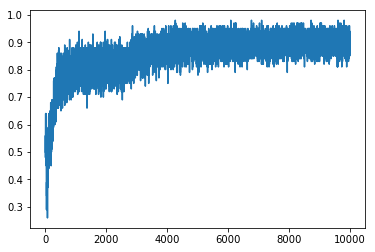

accuracy= 90.8200025558


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(acc)
plt.show()
print("accuracy=", 100*accuracy.eval(feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

# Fully connected neural network

In [48]:


x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.truncated_normal([784, 1024]))
b1 = tf.Variable(tf.truncated_normal([1024]))


W2 = tf.Variable(tf.truncated_normal([1024, 10]))
b2 = tf.Variable(tf.truncated_normal([10]))


h1=tf.nn.relu(tf.matmul(x, W1) + b1)

y_pred = tf.nn.softmax(tf.matmul(h1, W2) + b2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



sess = tf.InteractiveSession()

tf.global_variables_initializer().run()
acc=np.zeros(10000)
for j in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    sess.run(train_step, feed_dict={x: batch_xs, y_true: batch_ys})
    acc[j]=accuracy.eval(feed_dict={x:batch_xs, y_true: batch_ys})
    if j%500==0:
        print('step %d, training accuracy %g' % (j, acc[j]))

step 0, training accuracy 0.101562
step 500, training accuracy 0.34375
step 1000, training accuracy 0.429688
step 1500, training accuracy 0.4375
step 2000, training accuracy 0.4375
step 2500, training accuracy 0.546875
step 3000, training accuracy 0.445312
step 3500, training accuracy 0.523438
step 4000, training accuracy 0.53125
step 4500, training accuracy 0.492188
step 5000, training accuracy 0.539062
step 5500, training accuracy 0.492188
step 6000, training accuracy 0.5
step 6500, training accuracy 0.515625
step 7000, training accuracy 0.546875
step 7500, training accuracy 0.53125
step 8000, training accuracy 0.570312
step 8500, training accuracy 0.53125
step 9000, training accuracy 0.492188
step 9500, training accuracy 0.59375


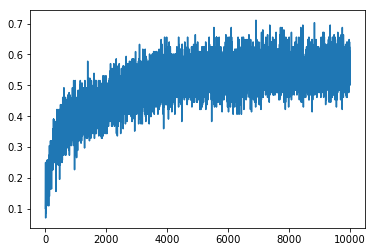

0.5569


In [49]:
plt.plot(acc)
plt.show()
print(accuracy.eval(feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

## Build a Multilayer Convolutional Network
<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png" width="800" align="middle">

### Auxiliar functions


In [14]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


### Network architecture

In [23]:

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024]) ## 7x7 will be the size of the output image
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2



## Train model

In [16]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    acc=np.zeros(20000)
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
              x: batch[0], y_true: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_true: batch[1], keep_prob: 0.5})
        acc[i]=accuracy.eval(feed_dict={x:batch[0], y_true: batch[1], keep_prob: 1.0})
    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_true: mnist.test.labels, keep_prob: 1.0}))


step 0, training accuracy 0.06
step 100, training accuracy 0.9
step 200, training accuracy 0.92
step 300, training accuracy 0.9
step 400, training accuracy 0.9
step 500, training accuracy 0.9
step 600, training accuracy 0.9
step 700, training accuracy 0.96
step 800, training accuracy 0.96
step 900, training accuracy 0.92
step 1000, training accuracy 0.98
step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 1
step 1400, training accuracy 0.98
step 1500, training accuracy 0.94
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 1
step 1900, training accuracy 0.96
step 2000, training accuracy 0.96
step 2100, training accuracy 1
step 2200, training accuracy 0.98
step 2300, training accuracy 1
step 2400, training accuracy 1
step 2500, training accuracy 0.96
step 2600, training accuracy 1
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 0.96
step 3000, training a

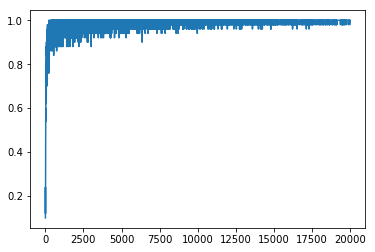

In [17]:
plt.plot(acc)
plt.show()

## Build a Multilayer Convolutional  using Keras


In [57]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Reshape, Dropout, normalization
from keras.models import Model
from keras import optimizers
from datetime import datetime


input_img= Input(shape=(28,28,1))  # adapt this if using `channels_first` image data format

#x=normalization.BatchNormalization()(x)
h = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
h = MaxPooling2D((2, 2), padding='same')(h)
h = Conv2D(64, (5, 5), activation='relu', padding='same')(h)
h = MaxPooling2D((2, 2), padding='same')(h)
h = Dropout(0.5)(h)
h = Reshape((int(h.shape[1]*h.shape[2]*h.shape[3]),))(h)
h = Dense(1024, activation='relu')(h)
h = Dense(10, activation='softmax')(h)

CNN = Model(input_img, h)
sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
CNN.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])




## Train model

In [58]:
x=np.zeros((mnist.train.images.shape[0], mnist.train.images.shape[1], 1))
x[:,:,0]=mnist.train.images

x=np.reshape(x,(55000,28,28,1))

xval=np.zeros((mnist.validation.images.shape[0], mnist.validation.images.shape[1], 1))
print(xval.shape)
xval[:,:,0]=mnist.validation.images
print(xval.shape)
X_val=np.reshape(xval,(5000,28,28,1))

y_true_val=mnist.validation.labels

y_true=mnist.train.labels


start=datetime.now()
history=CNN.fit(x, y_true, epochs=10, batch_size=100, shuffle=True, validation_data=(X_val, y_true_val))
time_r=datetime.now()-start


(5000, 784, 1)
(5000, 784, 1)
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 186s - loss: 1.1957 - acc: 0.6266 - val_loss: 0.3069 - val_acc: 0.9116
Epoch 2/10
55000/55000 [==============================] - 233s - loss: 0.3140 - acc: 0.9047 - val_loss: 0.1875 - val_acc: 0.9456
Epoch 3/10
55000/55000 [==============================] - 211s - loss: 0.2135 - acc: 0.9356 - val_loss: 0.1346 - val_acc: 0.9616
Epoch 4/10
55000/55000 [==============================] - 206s - loss: 0.1670 - acc: 0.9500 - val_loss: 0.1085 - val_acc: 0.9710
Epoch 5/10
55000/55000 [==============================] - 200s - loss: 0.1397 - acc: 0.9575 - val_loss: 0.0919 - val_acc: 0.9746
Epoch 6/10
55000/55000 [==============================] - 191s - loss: 0.1244 - acc: 0.9625 - val_loss: 0.0813 - val_acc: 0.9776
Epoch 7/10
55000/55000 [==============================] - 190s - loss: 0.1129 - acc: 0.9659 - val_loss: 0.0762 - val_acc: 0.9766
Epoch 8/10
55000/5

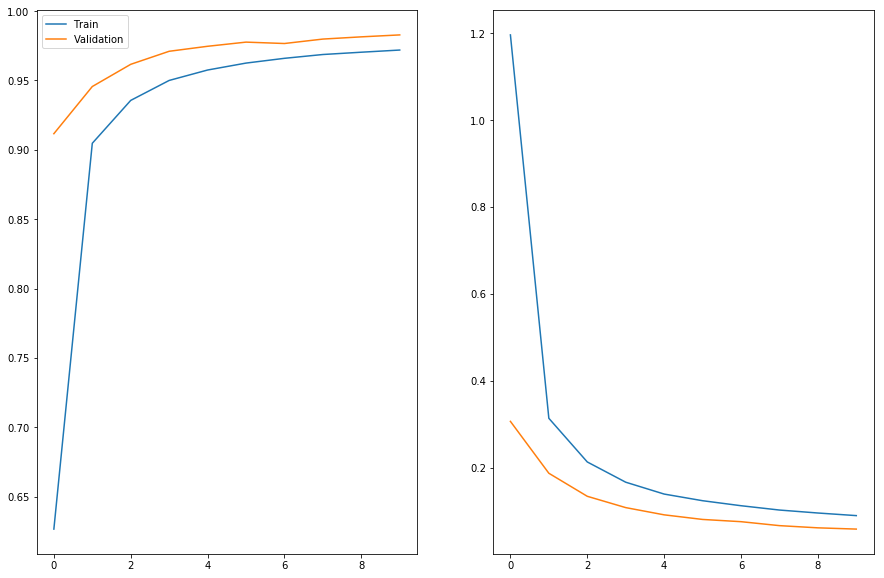

(10000, 784, 1)
(10000, 784, 1)
Train accuracy= 0.971890917475
Validation accuracy= 0.982800011635
Test accuracy= 98.15
Training time 0:33:46.286261


In [62]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.legend()
plt.subplot(122)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.show()


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])



xtest=np.zeros((mnist.test.images.shape[0], mnist.test.images.shape[1], 1))
print(xtest.shape)
xtest[:,:,0]=mnist.test.images
print(xtest.shape)
xTest=np.reshape(xtest,(10000,28,28,1))

y_true_test=mnist.test.labels


y_pred = CNN.predict(xTest)

accTest=accuracy(y_pred, y_true_test)

print('Train accuracy=', history.history['acc'][-1])
print('Validation accuracy=', history.history['val_acc'][-1])

print('Test accuracy=', accTest)
print('Training time', time_r)

# Classification of PD handwriting with a CNN in Keras

In [76]:
PATH_HC='./data/hc_image/200_150/'
PATH_PD='./data/pd_image/200_150/'
SIZE_IMAGE=[150,200]
PIXEL_DEPTH=255

FILTER_SIZE_C1=5
FILTER_SIZE_C2=5
FILTER_SIZE_C3=5

DEPTH_C1=4
DEPTH_C2=8
DEPTH_C3=16

HIDDEN=256
BATCH_SIZE=128
EPOCHS=100

### Prepare data

Read data


In [71]:
import os
from scipy import ndimage

dirhc=os.listdir(PATH_HC)
dirpd=os.listdir(PATH_PD)

dirhc.sort()
dirpd.sort()
imageHC=np.zeros((len(dirhc), SIZE_IMAGE[0], SIZE_IMAGE[1],1))
imagePD=np.zeros((len(dirpd), SIZE_IMAGE[0], SIZE_IMAGE[1],1))

labelsHC=np.vstack((np.zeros(len(dirhc)), np.ones(len(dirhc)))).T
labelsPD=np.vstack((np.ones(len(dirpd)), np.zeros(len(dirpd)))).T

IDHC=np.zeros(len(dirhc))
IDPD=np.zeros(len(dirpd))

for j in range(len(dirhc)):
    image_file=PATH_HC+dirhc[j]
    image_data = (ndimage.imread(image_file).astype(float) - PIXEL_DEPTH / 2) / PIXEL_DEPTH
    image_datagray=image_data.mean(axis=2)
    imageHC[j,:,:,0]=image_datagray
    IDHC[j]=int(dirhc[j][7:10])
    
print(np.unique(IDHC))
    
for j in range(len(dirpd)):
    image_file=PATH_PD+dirpd[j]
    image_data = (ndimage.imread(image_file).astype(float) - PIXEL_DEPTH / 2) / PIXEL_DEPTH
    image_datagray=image_data.mean(axis=2)
    imagePD[j,:,:,0]=image_datagray
    IDPD[j]=int(dirpd[j][4:7])+max(IDHC)

print(imageHC.shape)
print(imagePD.shape)
print(labelsHC.shape, labelsPD.shape)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]
(679, 150, 200, 1)
(520, 150, 200, 1)
(679, 2) (520, 2)


### Display some images

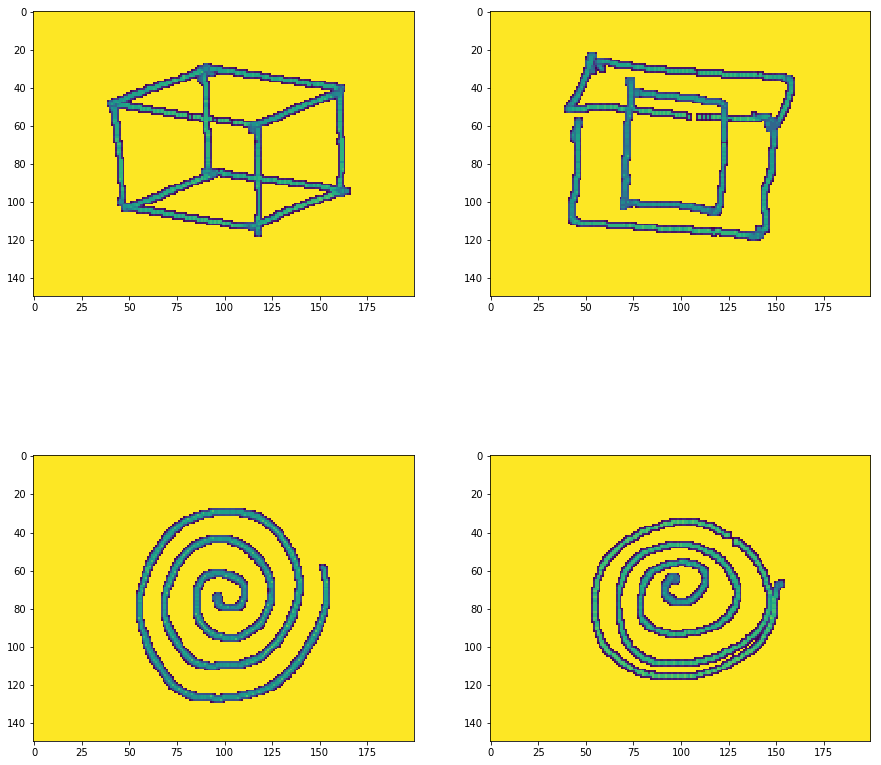

In [72]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(imageHC[4,:,:,0])
plt.subplot(2,2,2)
plt.imshow(imagePD[14,:,:,0])
plt.subplot(2,2,3)
plt.imshow(imageHC[16,:,:,0])
plt.subplot(2,2,4)
plt.imshow(imagePD[50,:,:,0])
plt.show()

### Radomize data and stack for train and test

In [74]:
from sklearn.model_selection import GroupKFold

images_all=np.concatenate((imageHC, imagePD), axis=0)
labels_all=np.vstack((labelsHC, labelsPD))
ID_all=np.hstack((IDHC, IDPD))


def randomize(dataset, labels, ID):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:,:]
    shuffled_labels = labels[permutation,:]
    shuffled_ID=ID[permutation]
    return shuffled_dataset, shuffled_labels, shuffled_ID


dataset, labels, ID=randomize(images_all, labels_all, ID_all)

print(dataset.shape, labels.shape, ID.shape)


gkf = GroupKFold(n_splits=10)
for train, test in gkf.split(dataset, labels, groups=ID):
    print(train.shape, test.shape)
    
x_train=dataset[train,:,:,:]
y_train=labels[train,:]
x_test=dataset[test,:,:,:]
y_test=labels[test,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1199, 150, 200, 1) (1199, 2) (1199,)
(1088,) (111,)
(1078,) (121,)
(1079,) (120,)
(1077,) (122,)
(1077,) (122,)
(1077,) (122,)
(1078,) (121,)
(1079,) (120,)
(1079,) (120,)
(1079,) (120,)
(1079, 150, 200, 1) (1079, 2)
(120, 150, 200, 1) (120, 2)


## Define the network architecture

In [88]:
input_img = Input(shape=(SIZE_IMAGE[0], SIZE_IMAGE[1],1))  # adapt this if using `channels_first` image data format

x = Conv2D(DEPTH_C1, (FILTER_SIZE_C1, FILTER_SIZE_C1), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(DEPTH_C2, (FILTER_SIZE_C2, FILTER_SIZE_C2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(DEPTH_C3, (FILTER_SIZE_C3, FILTER_SIZE_C3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)


print(x.shape)
print(x.shape[1]*x.shape[2]*x.shape[3])
x= Reshape((int(x.shape[1]*x.shape[2]*x.shape[3]),))(x)
print(x.shape)
x = Dense(HIDDEN, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

CNN = Model(input_img, x)
CNN.compile(optimizer='rmsprop', loss='categorical_crossentropy')

CNN.summary()

(?, 19, 25, 16)
7600
(?, 7600)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 150, 200, 1)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 150, 200, 4)       104       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 75, 100, 4)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 75, 100, 8)        808       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 38, 50, 8)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 38, 50, 16)        3216      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 19, 25, 1

## Train the network

Epoch 1/100
1079/1079 [==============================] - 15s - loss: 0.8821    
Epoch 2/100
1079/1079 [==============================] - 15s - loss: 0.6617    
Epoch 3/100
1079/1079 [==============================] - 15s - loss: 0.6380    
Epoch 4/100
1079/1079 [==============================] - 15s - loss: 0.6152    
Epoch 5/100
1079/1079 [==============================] - 18s - loss: 0.5938    
Epoch 6/100
1079/1079 [==============================] - 17s - loss: 0.5512    
Epoch 7/100
1079/1079 [==============================] - 18s - loss: 0.5786    
Epoch 8/100
1079/1079 [==============================] - 21s - loss: 0.4760    
Epoch 9/100
1079/1079 [==============================] - 19s - loss: 0.5206    
Epoch 10/100
1079/1079 [==============================] - 18s - loss: 0.4736    
Epoch 11/100
1079/1079 [==============================] - 17s - loss: 0.4365    
Epoch 12/100
1079/1079 [==============================] - 19s - loss: 0.4149    
Epoch 13/100
1079/1079 [=============

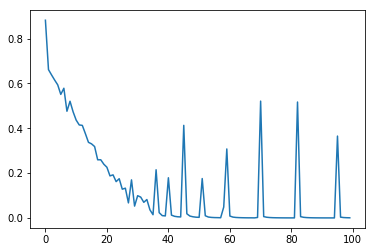

In [85]:
history=CNN.fit(x_train, y_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True)

plt.plot(history.history['loss'])

### Predict output of the CNN

In [83]:
y_pred = CNN.predict(x_test)
print (y_pred.shape)

y_test1=np.argmax(y_test,axis=1)
print(y_test1)
y_pred1=np.argmax(y_pred,axis=1)
print(y_pred1)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test1, y_pred1))



(120, 2)
[0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 0]
[1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1
 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0]
0.708333333333


# Did i already learn TensorFlow and deep learning?

## NO


Missing: 

1. Recrrent neural networks and LSTM cells

<img src="https://deeplearning4j.org/img/greff_lstm_diagram.png" width="500" align="middle">

2. Other architectures

http://www.asimovinstitute.org/neural-network-zoo/

3. Conventional architectures

    VGG 16 (https://arxiv.org/pdf/1409.1556.pdf)
    
    Inception <img src="http://machinethink.net/images/vggnet-convolutional-neural-network-iphone/Inception.png" width="800" align="middle">
    
    Squeezenet (https://arxiv.org/pdf/1602.07360.pdf)
    
    Densenet (https://arxiv.org/pdf/1608.06993.pdf)


4. Generative adversarial networks

    Inception <img src="http://www.kdnuggets.com/wp-content/uploads/generative-adversarial-network.png" width="500" align="middle">


# What else to learn

## Spark

<img src="https://spark.apache.org/images/spark-logo-trademark.png" width="300" align="middle">
<img src="https://qph.ec.quoracdn.net/main-thumb-t-1565095-200-qoqwygfcsqtavnxgaiqjxrfukbqvgtps.jpeg" width="300" align="middle">

https://databricks.com/blog/2016/01/25/deep-learning-with-apache-spark-and-tensorflow.html

<img src="https://databricks.com/wp-content/uploads/2016/01/image04.png" width="500" align="middle">


## Bayesian optimization

https://github.com/fmfn/BayesianOptimization





## Useful libraries


### KerasVis
https://raghakot.github.io/keras-vis/

### Tensorfire
https://tenso.rs/

